In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [60]:
# import the dataset
diabetes_pred='/content/drive/MyDrive/Ml_datsets/diabetes2.csv'
df=pd.read_csv(diabetes_pred)

In [61]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
# df.info()

The dataset has no missing values

In [63]:
# Convert te target variable from integer to an object
df['Outcome'] = df['Outcome'].astype(str)

#### Analyze the Dependent Variable

In [64]:
# count no of patients in each class of the target variable
df.groupby('Outcome')['Glucose'].size()

Outcome
0    500
1    268
Name: Glucose, dtype: int64

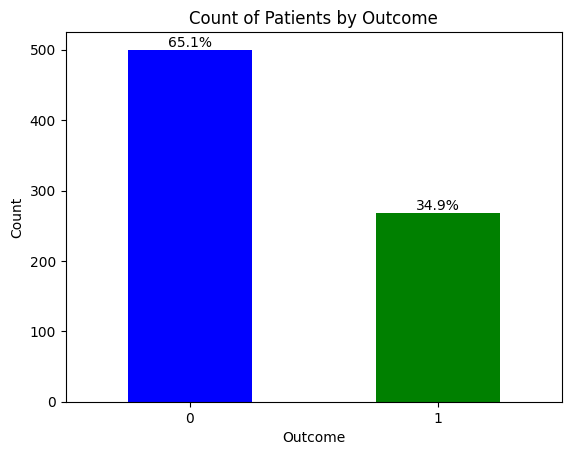

In [65]:
import matplotlib.pyplot as plt

# Grouping by 'Outcome' and getting the size of 'Glucose' in each group
outcome_glucose_count = df.groupby('Outcome')['Glucose'].size()

# Calculate percentage of total
percentages = outcome_glucose_count / outcome_glucose_count.sum() * 100

# Plotting the bar graph
ax = outcome_glucose_count.plot(kind='bar', color=['blue', 'green'])  # You can customize colors as needed

# Adding data labels showing percentages
for i, v in enumerate(outcome_glucose_count):
    ax.text(i, v + 0.5, f"{percentages[i]:.1f}%", ha='center', va='bottom')

plt.title('Count of Patients by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The dataset is imbalanced.The positive class(1) constitutes 34.9% of the data. 65.1% of the dataset makes the negative class(0). An imbalanced dataset - the number of observations is not same for all classes in a classification model.

### Analyzing the Independent Variables

In [66]:
# descriptive statistics of the variables
features_df=df.drop(columns=['Outcome'])
features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


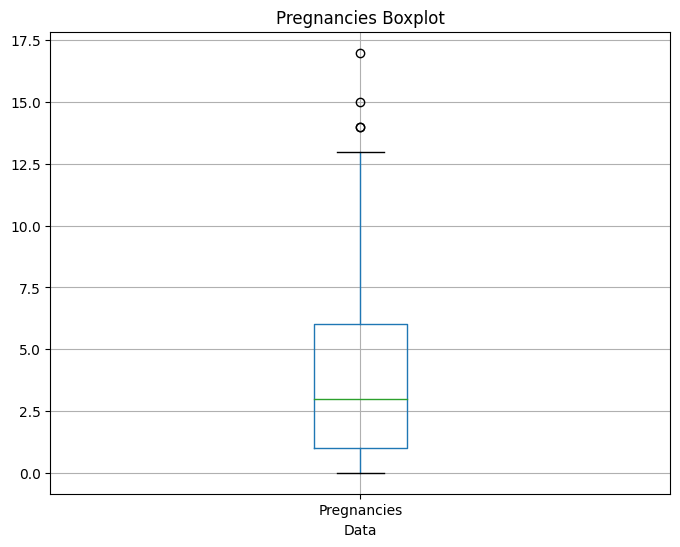

In [67]:
  # Creating a boxplot for Pregnancies
plt.figure(figsize=(8, 6))
df.boxplot(column='Pregnancies')
plt.title('Pregnancies Boxplot')
plt.xlabel('Data')
plt.grid(True)
plt.show()

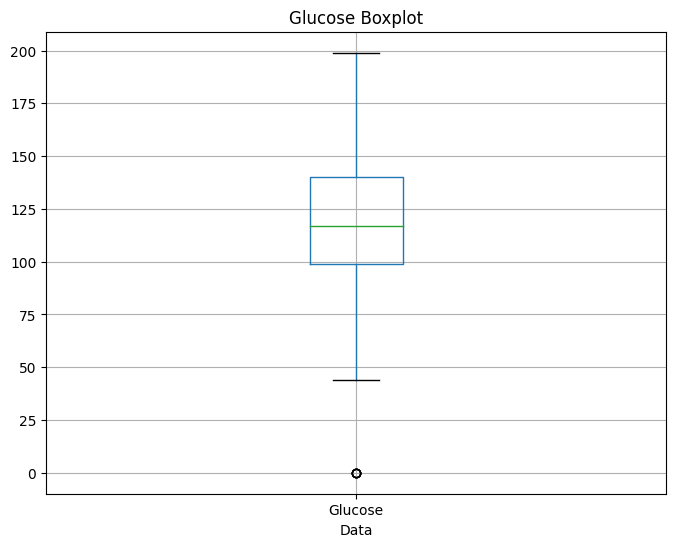

In [68]:
# Creating a boxplot for Glucose
plt.figure(figsize=(8, 6))
df.boxplot(column='Glucose')
plt.title('Glucose Boxplot')
plt.xlabel('Data')
plt.grid(True)
plt.show()

In [69]:
# Counting the number of rows where glucose level is 0
glucose_zero_count = (features_df['Glucose'] == 0).sum()

print("Number of rows where glucose level is 0:", glucose_zero_count)

Number of rows where glucose level is 0: 5


glucose of zero is not realistic,therefore glucose evel of zero is an outlier. Replace Zeros with the mean of Glucose level

In [70]:
# Calculate the mean of non-zero glucose values
glucose_mean = df[df['Glucose'] != 0]['Glucose'].mean()

# Replace zero values with the mean of non-zero glucose values
df['Glucose'] = df['Glucose'].replace(0, glucose_mean)

# print(features_df)

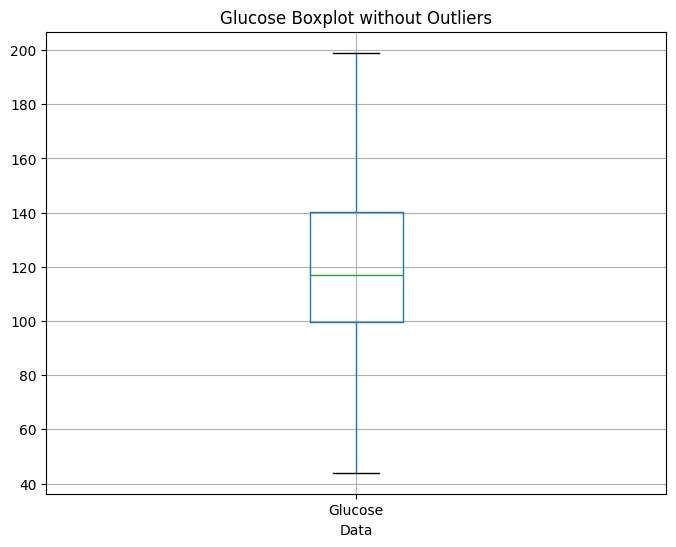

In [71]:
  # Creating a boxplot for Glucose after removal of outliers
plt.figure(figsize=(8, 6))
df.boxplot(column='Glucose')
plt.title('Glucose Boxplot without Outliers')
plt.xlabel('Data')
plt.grid(True)
plt.show()

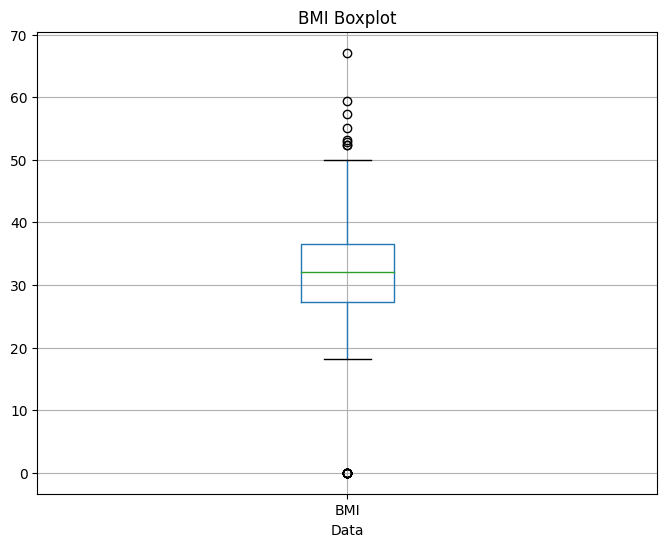

In [72]:
# Creating a boxplot for BMI
plt.figure(figsize=(8, 6))
df.boxplot(column='BMI')
plt.title('BMI Boxplot')
plt.xlabel('Data')
plt.grid(True)
plt.show()

In [73]:
# Calculate the mean of non-zero BMI values
BMI_mean = df[df['BMI'] != 0]['BMI'].mean()

# Replace zero values with the mean of non-zero BMI values
df['BMI'] = df['BMI'].replace(0, BMI_mean)

# print(features_df)

In [74]:
# Replace the outlier value with lower limit values using IQR
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the lower bound values
df.loc[df['BMI'] > upper_bound, 'BMI'] = upper_bound
print(upper_bound)

50.25


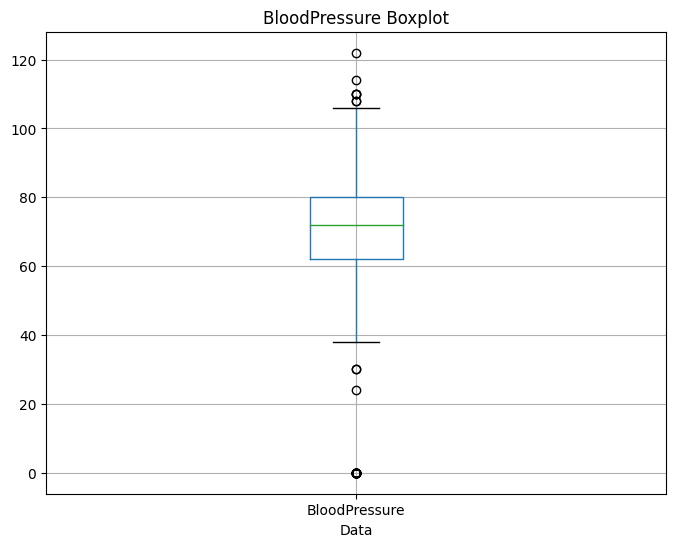

In [75]:
  # Creating a boxplot for BloodPressure
plt.figure(figsize=(8, 6))
df.boxplot(column='BloodPressure')
plt.title('BloodPressure Boxplot')
plt.xlabel('Data')
plt.grid(True)
plt.show()

In [76]:
# Counting the number of rows where BloodPressure level is 0
BloodPressure_zero_count = (df['BloodPressure'] == 0).sum()

print("Number of rows where BloodPressure level is 0:", BloodPressure_zero_count)

Number of rows where BloodPressure level is 0: 35


In [77]:
# Replace zore values with the mean of BloodPressure
BloodPressure_mean = df[df['BloodPressure'] != 0]['BloodPressure'].mean()

df['BloodPressure'] = df['BloodPressure'].replace(0, BloodPressure_mean)

In [78]:
# # Replace the outlier value with lower limit values using IQR
# # Calculate the first quartile (Q1)
# Q1 = features_df['BloodPressure'].quantile(0.25)
# Q3 = features_df['BloodPressure'].quantile(0.75)

# # Calculate the interquartile range (IQR)
# IQR = Q3 - Q1

# # Define the lower and upper bounds to identify outliers
# lower_bound = Q1 - 1.5 * IQR

# # Replace outliers with the lower bound values
# df.loc[df['BloodPressure'] < lower_bound, 'BloodPressure'] = lower_bound
# print(lower_bound)

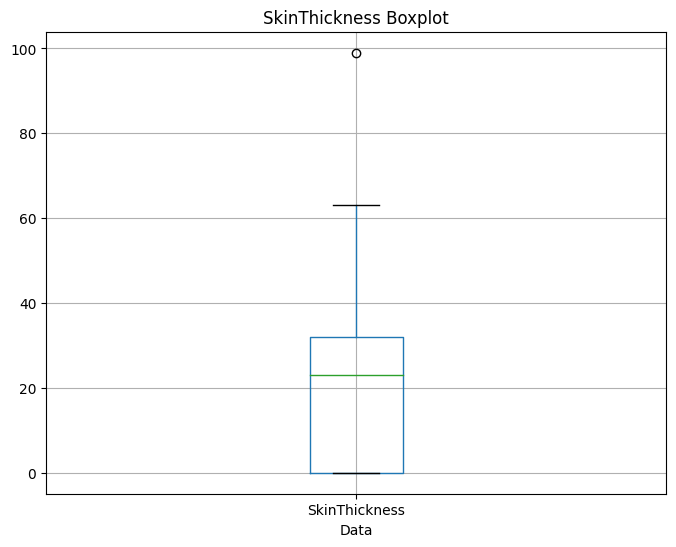

In [79]:
# Creating a boxplot for SkinThickness
plt.figure(figsize=(8, 6))
df.boxplot(column='SkinThickness')
plt.title('SkinThickness Boxplot')
plt.xlabel('Data')
plt.grid(True)
plt.show()

In [80]:
# Counting the number of rows where BloodPressure level is 0
SkinThickness_zero_count = (df['SkinThickness'] == 0).sum()

print("Number of rows where SkinThickness is 0:", SkinThickness_zero_count)

Number of rows where SkinThickness is 0: 227


In [81]:
# Replace zore values with the mean of SkinThickness
SkinThickness_mean = df[df['SkinThickness'] != 0]['SkinThickness'].mean()

df['SkinThickness'] = df['SkinThickness'].replace(0, SkinThickness_mean)

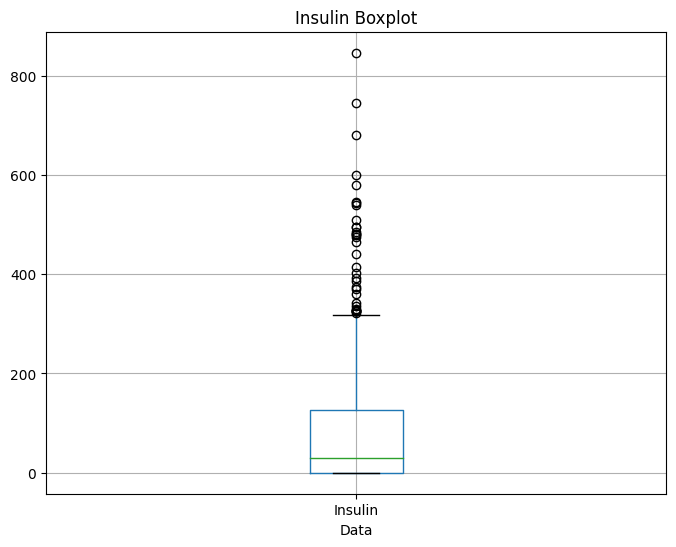

In [82]:
# Creating a boxplot for Insulin
plt.figure(figsize=(8, 6))
df.boxplot(column='Insulin')
plt.title('Insulin Boxplot')
plt.xlabel('Data')
plt.grid(True)
plt.show()

In [83]:
# Counting the number of rows where BloodPressure level is 0
Insulin_zero_count = (df['Insulin'] == 0).sum()

print("Number of rows where Insulin is 0:", Insulin_zero_count)

Number of rows where Insulin is 0: 374


In [84]:
# Replace zore values with the mean of Insulin
Insulin_mean = df[df['Insulin'] != 0]['Insulin'].mean()

df['Insulin'] = df['Insulin'].replace(0, Insulin_mean)

In [85]:
print(Insulin_mean)

155.5482233502538


Examine the relationship between the Independent Variables

<ipython-input-86-3524dd1c2e0f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


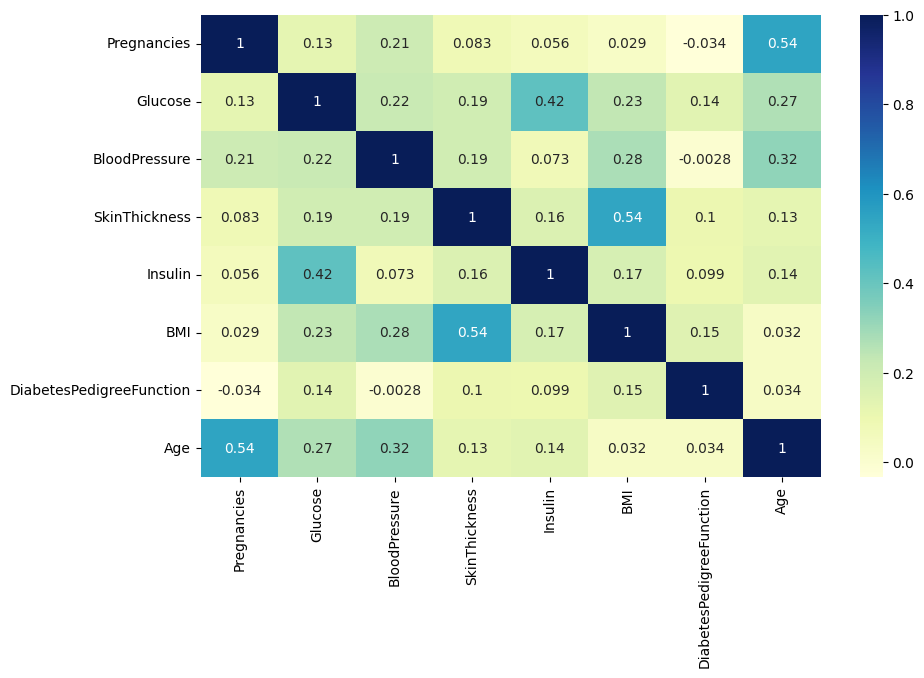

In [86]:
# plot a correlation heat map
plt.figure(figsize=(10, 6))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Pregnancies has a weak correlation with all the other independet variables except Age, which exhibits as moderate positive corr of .54
Skin thickness and insulin have a moderate corr of .44
Insulin and glucose also have a weak positive corr of .33
Most varibles have weak positive correlation btw each other. Note that if 2 independent variables have a strong positive or a strong negative correlation, it is advisable to drop one of the variables before going into the training step.

#### Relationship btw the Independent Variables and the Target Variable

In [87]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB


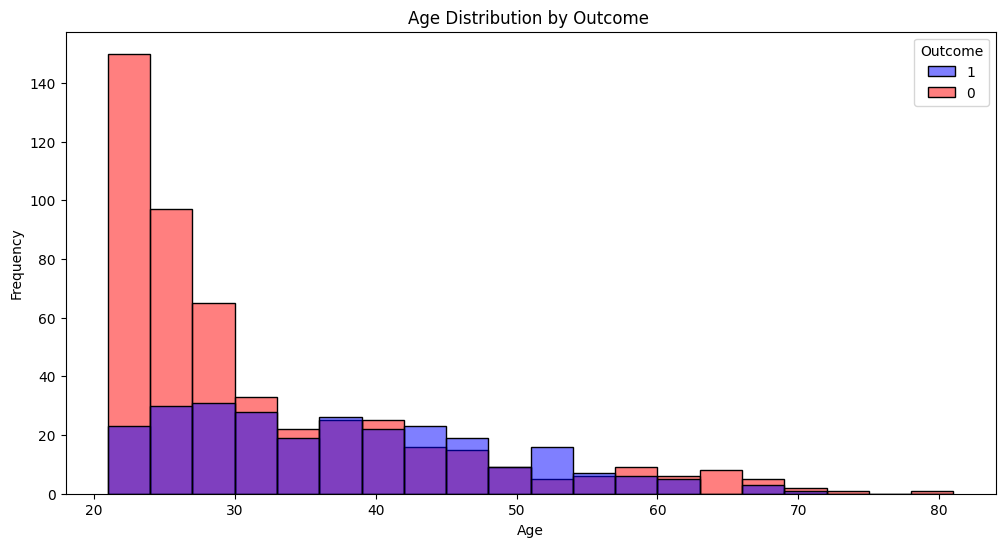

In [89]:
# Age
# DiabetesPedigreeFunction
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for DiabetesPedigreeFunction with color coding for Outcome
sns.histplot(data=df, bins=20, x='Age', hue='Outcome', palette=['blue', 'red'], alpha=0.5)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Outcome ')

# Display the plot
plt.show()



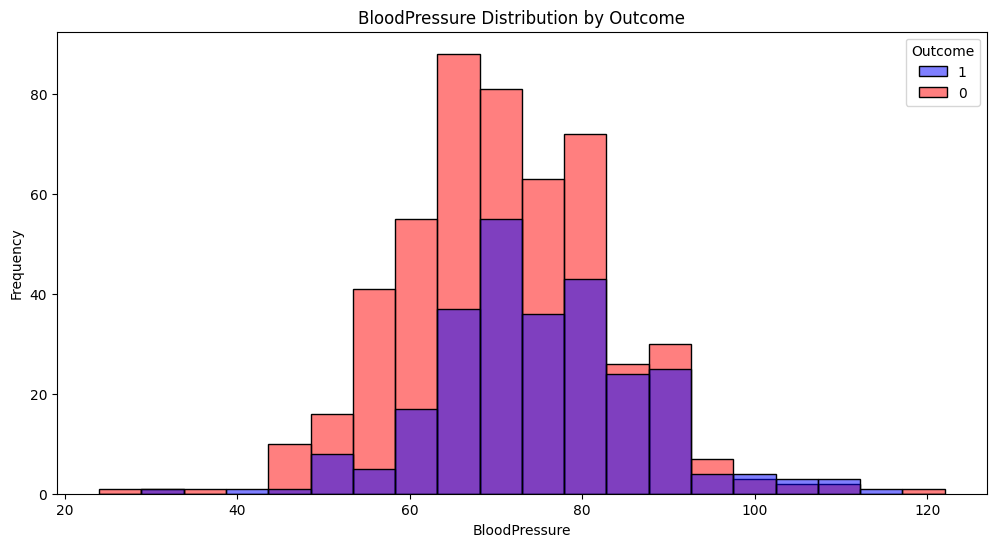

In [90]:
# BloodPressure
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for DiabetesPedigreeFunction with color coding for Outcome
sns.histplot(data=df, bins=20, x='BloodPressure', hue='Outcome', palette=['blue', 'red'], alpha=0.5)

# Add labels and title
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.title('BloodPressure Distribution by Outcome')

# Display the plot
plt.show()



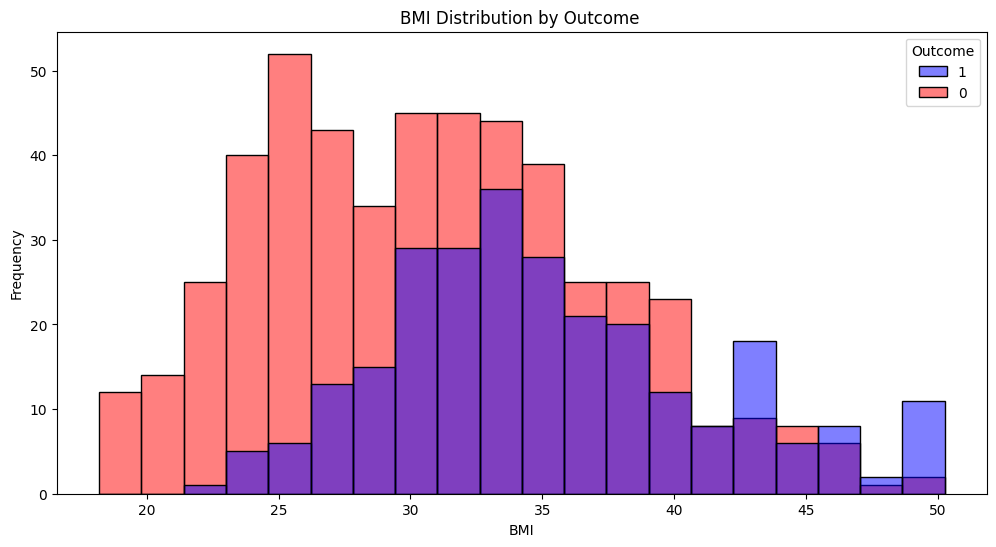

In [91]:
# BMI
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for DiabetesPedigreeFunction with color coding for Outcome
sns.histplot(data=df, bins=20, x='BMI', hue='Outcome', palette=['blue', 'red'], alpha=0.5)

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution by Outcome ')

# Display the plot
plt.show()

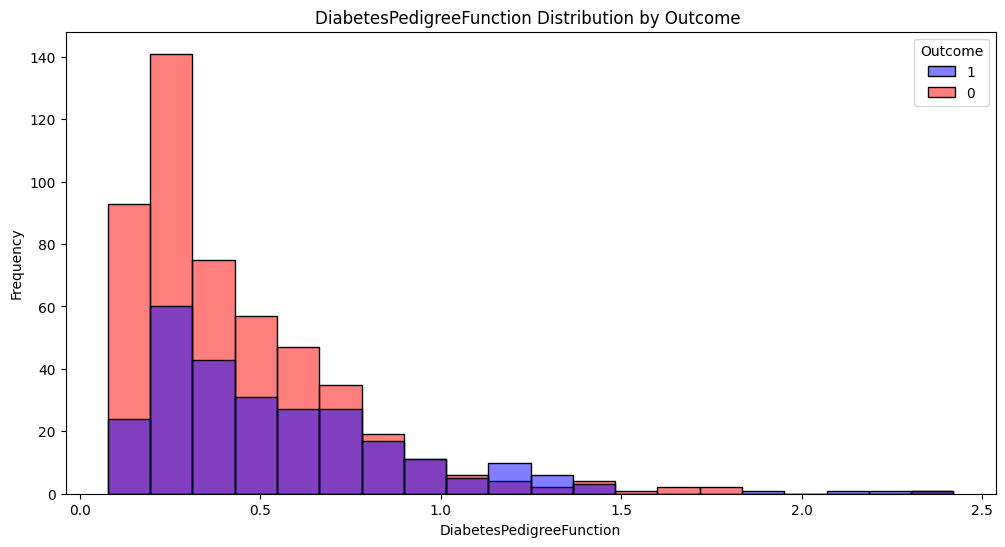

In [92]:
# DiabetesPedigreeFunction
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for DiabetesPedigreeFunction with color coding for Outcome
sns.histplot(data=df, bins=20, x='DiabetesPedigreeFunction', hue='Outcome', palette=['blue', 'red'], alpha=0.5)

# Add labels and title
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Frequency')
plt.title('DiabetesPedigreeFunction Distribution by Outcome ')

# Display the plot
plt.show()


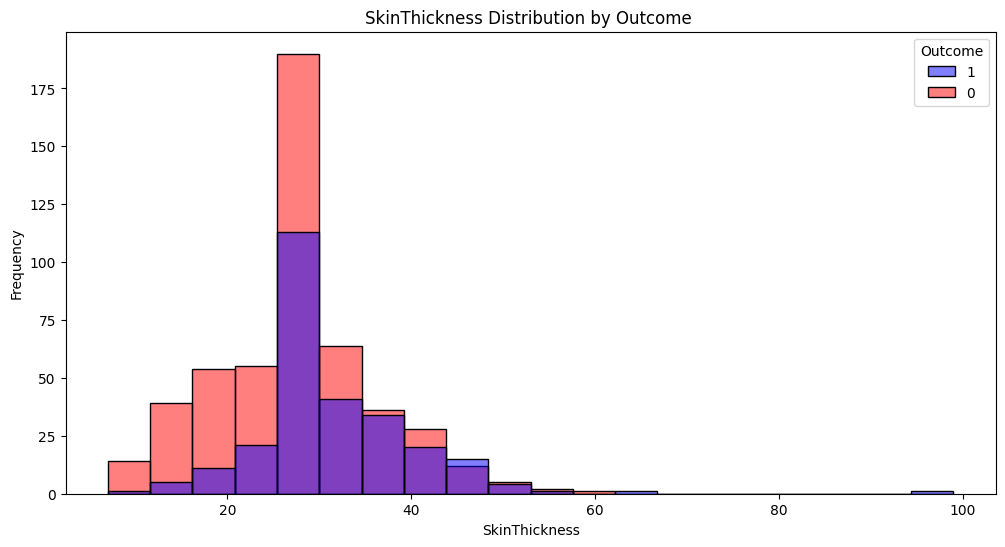

In [93]:
# SkinThickness
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for DiabetesPedigreeFunction with color coding for Outcome
sns.histplot(data=df, bins=20, x='SkinThickness', hue='Outcome', palette=['blue', 'red'], alpha=0.5)

# Add labels and title
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')
plt.title('SkinThickness Distribution by Outcome ')

# Display the plot
plt.show()

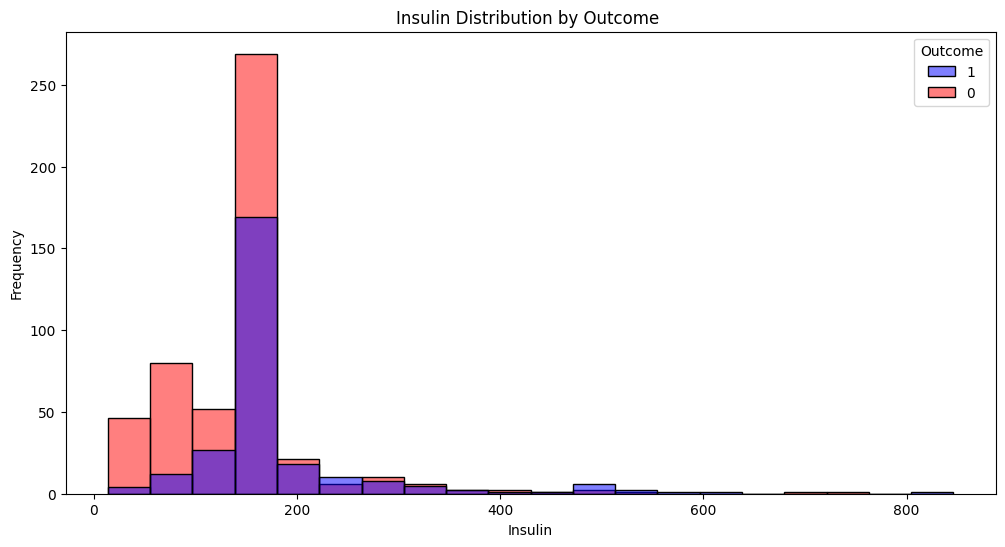

In [94]:
# Insulin
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for DiabetesPedigreeFunction with color coding for Outcome
sns.histplot(data=df, bins=20, x='Insulin', hue='Outcome', palette=['blue', 'red'], alpha=0.5)

# Add labels and title
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.title('Insulin Distribution by Outcome ')

# Display the plot
plt.show()

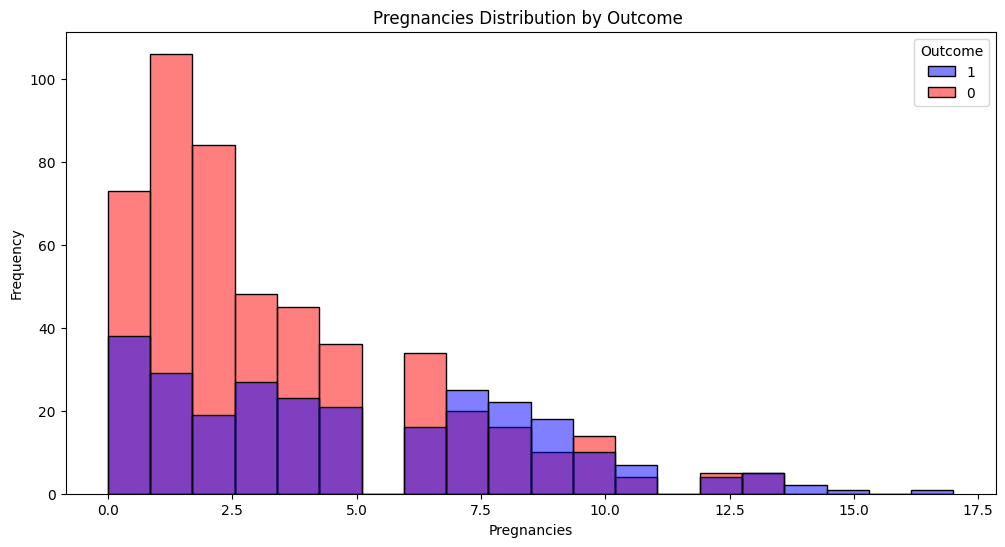

In [95]:
# Pregnancies
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for DiabetesPedigreeFunction with color coding for Outcome
sns.histplot(data=df, bins=20, x='Pregnancies', hue='Outcome', palette=['blue', 'red'], alpha=0.5)

# Add labels and title
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.title('Pregnancies Distribution by Outcome ')

# Display the plot
plt.show()

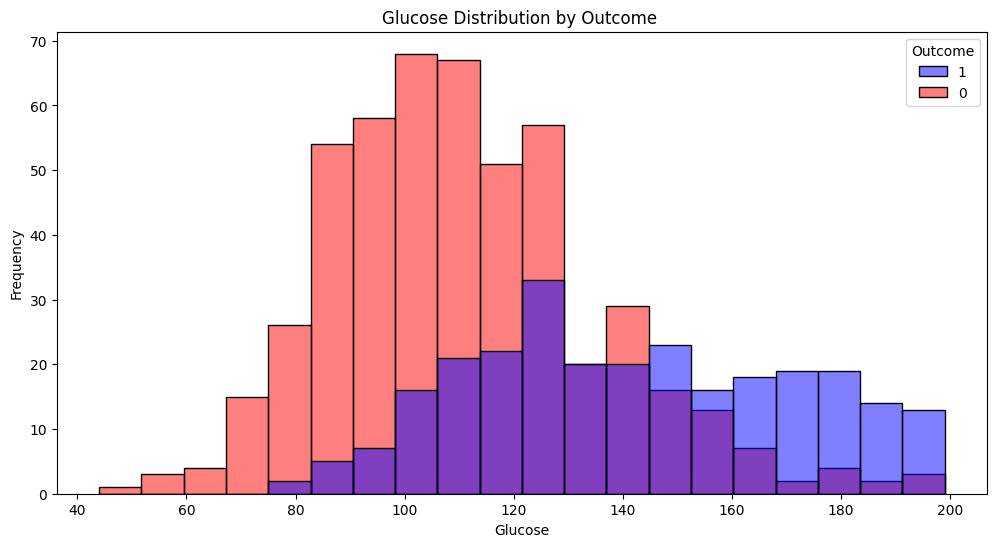

In [96]:
# Glucose
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for DiabetesPedigreeFunction with color coding for Outcome
sns.histplot(data=df, bins=20, x='Glucose', hue='Outcome', palette=['blue', 'red'], alpha=0.5)

# Add labels and title
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Glucose Distribution by Outcome ')

# Display the plot
plt.show()

Conclusion


*  Majority of people who are 30 yrs of age and above tend to have diabetes. The proportion of this age group that are affected is higher than those below the age of 30.
* Majority of those with diabetes have blood pressure of 25 and above
* The higher the BMI index,skinthickness,glucose level and insulin,the higher chances of a person being infected
*





Split the Data into Train and Test

In [97]:
#independent variable-features
#dependent variale-target variable
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [98]:
from sklearn.model_selection import train_test_split

# Split your data into training (70%) and the rest (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the remaining data into validation (15%) and testing (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42,shuffle=True)


In [99]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(537, 8)
(116, 8)
(115, 8)
(537,)
(116,)
(115,)


In [100]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95.0,60.0,18.0,58.0,23.9,0.260,22
139,5,105.0,72.0,29.0,325.0,36.9,0.159,28
485,0,135.0,68.0,42.0,250.0,42.3,0.365,24
547,4,131.0,68.0,21.0,166.0,33.1,0.160,28
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33


#### Featurer Scaling

In [101]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

# print("Scaled Training Data:\5", X_train_scaled)
# print("Scaled Test Data:\5", X_test_scaled)

In [102]:
# X_train_scaled

### Model Training

In [103]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

Logistice Regression

In [104]:

model = LogisticRegression()     # create an instance for logistic regression
model.fit(X_train,y_train)      # train logisticregression model on the training data
y_pred=model.predict(X_val)     # trained logistic regression model (model) makes predictions on the validation data (X_val) which is stored as y_pred
print('The accuracy_score',accuracy_score(y_val,y_pred))
print('The precision_score',precision_score(y_val,y_pred,pos_label='1'))
print('The recall',recall_score(y_val,y_pred,pos_label='1'))
print('The f1_score',f1_score(y_val,y_pred,pos_label='1'))

print("Confusion Matrix:\n",confusion_matrix(y_val,y_pred))

The accuracy_score 0.7391304347826086
The precision_score 0.6
The recall 0.5675675675675675
The f1_score 0.5833333333333333
Confusion Matrix:
 [[64 14]
 [16 21]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 The fit() method adjusts the parameters of the logistic regression model to minimize the error between the predicted and actual labels

KNN

In [105]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5) # You can adjust n_neighbors based on your dataset
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_val)

print('\nK-Nearest Neighbors Metrics:')
print('Accuracy:', accuracy_score(y_val, y_pred_knn))
print('Precision:', precision_score(y_val, y_pred_knn, pos_label='1'))
print('Recall:', recall_score(y_val, y_pred_knn, pos_label='1'))
print('F1 Score:', f1_score(y_val, y_pred_knn, pos_label='1'))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))


K-Nearest Neighbors Metrics:
Accuracy: 0.7043478260869566
Precision: 0.5348837209302325
Recall: 0.6216216216216216
F1 Score: 0.575
Confusion Matrix:
 [[58 20]
 [14 23]]


Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_val)

print('\nDecision Tree Metrics:')
print('Accuracy:', accuracy_score(y_val, y_pred_dt))
print('Precision:', precision_score(y_val, y_pred_dt, pos_label='1'))
print('Recall:', recall_score(y_val, y_pred_dt, pos_label='1'))
print('F1 Score:', f1_score(y_val, y_pred_dt, pos_label='1'))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_dt))


Decision Tree Metrics:
Accuracy: 0.7217391304347827
Precision: 0.5490196078431373
Recall: 0.7567567567567568
F1 Score: 0.6363636363636364
Confusion Matrix:
 [[55 23]
 [ 9 28]]


Rabdom Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model with a specified number of trees
model_rf = RandomForestClassifier(n_estimators=100) # n_estimators represents the number of trees

# Fit the model on the training data
model_rf.fit(X_train, y_train)

# Predict on the validation set
y_pred_rf = model_rf.predict(X_val)

# Evaluate the Random Forest model
print('\nRandom Forest Metrics:')
print('Accuracy:', accuracy_score(y_val, y_pred_rf))
print('Precision:', precision_score(y_val, y_pred_rf, pos_label='1'))
print('Recall:', recall_score(y_val, y_pred_rf, pos_label='1'))
print('F1 Score:', f1_score(y_val, y_pred_rf, pos_label='1'))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))



Random Forest Metrics:
Accuracy: 0.7217391304347827
Precision: 0.5641025641025641
Recall: 0.5945945945945946
F1 Score: 0.5789473684210528
Confusion Matrix:
 [[61 17]
 [15 22]]


In this cases,the cost of a FN> that that of a FP, we therefore put much emphasis on Recall and an algorithm with the highest recall score.This is because Recall measures the ability of a model to correctly identify all positive instances, and in situations where missing a positive instance (FN) has serious consequences, maximizing Recall becomes critical.Choose Random Forest since it has a high recall of 0.62 and a relatively high accuracy of 0.739

### The ROC

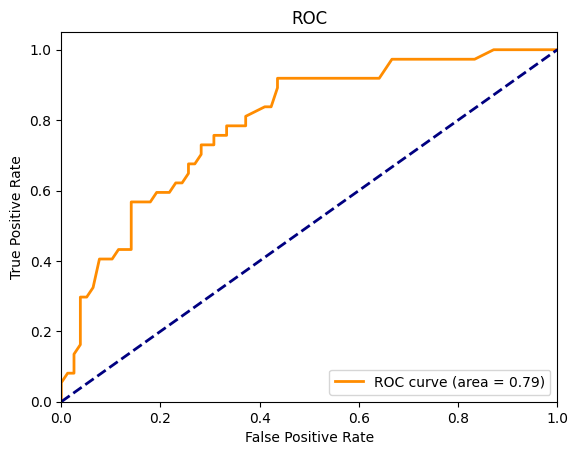

In [108]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_pred_proba_rf = model_rf.predict_proba(X_val)[:, 1]

# Compute ROC curve and ROC area for the model
fpr, tpr, _ = roc_curve(y_val, y_pred_proba_rf, pos_label='1')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


AUC represents the probability that a random positive (has diabetes) example is positioned to the right of a random negative (no diabetes).AUC of 0.79- there is a 79% probability that the model will accurately indetify a positive class.

### Learning Curve

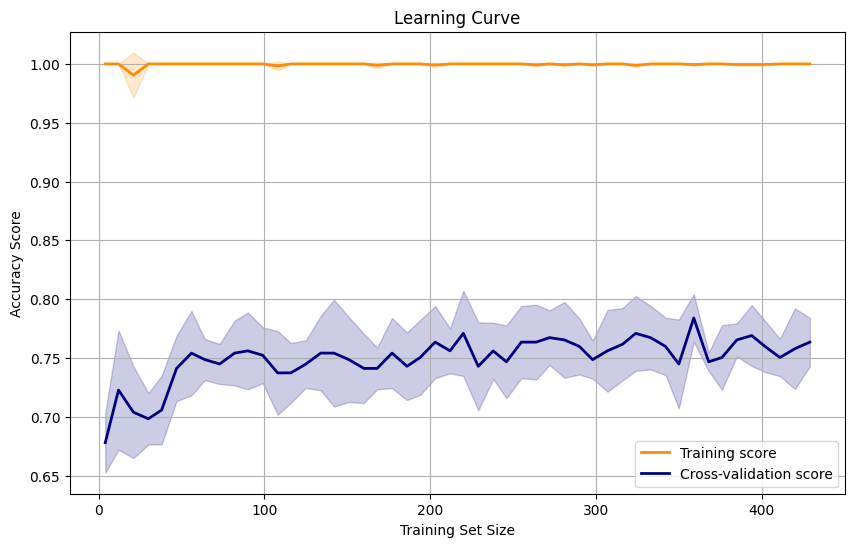

In [109]:
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(n_estimators=50), X_train, y_train, cv=5,
    scoring='accuracy', # Change this to any other performance metric if needed
    n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Calculate mean and standard deviation for test set (validation) scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training score", color="darkorange", lw=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkorange", alpha=0.2)

plt.plot(train_sizes, test_mean, label="Cross-validation score", color="navy", lw=2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="navy", alpha=0.2)

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [110]:
# # Generate learning curves
# train_sizes, train_scores, test_scores = learning_curve(
#     model, X_train, y_train, cv=5, n_jobs=-1,
#     train_sizes=np.linspace(0.01, 1.0, 50),
#     scoring='accuracy'  # You can use recall here instead of accuracy since you're interested in Recall
# )

# # Calculate the average and standard deviation of the train and test scores
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# # Plotting the learning curve
# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

# plt.title("Learning Curve")
# plt.xlabel("Training Set Size")
# plt.ylabel("Accuracy Score")
# plt.legend(loc="best")
# plt.grid()
# plt.show()

### Hyper-Parameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                           cv = 3, n_jobs = -1, verbose = 2, scoring = 'accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new model with the best parameters
best_rf = RandomForestClassifier(**best_params)

# Fit the best model to the data
best_rf.fit(X_train, y_train)

# Make predictions with the best model
y_pred_best = best_rf.predict(X_val)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [54]:
# Print the best hyperparameters and the corresponding best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"The best hyperparameters from GridSearchCV are: {best_params}")
print(f"The best cross-validation accuracy from GridSearchCV is: {best_score}")

# The best_score_ attribute gives you the best score observed during the optimization process,

The best hyperparameters from GridSearchCV are: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
The best cross-validation accuracy from GridSearchCV is: 0.7783985102420856


In [55]:
# Make predictions on the test set using the be parameters
y_pred_test = best_rf.predict(X_test)

# Calculate probabilities for the ROC curve
y_pred_proba_test = best_rf.predict_proba(X_test)[:, 1]

# Calculate the various performance metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, pos_label='1')
recall = recall_score(y_test, y_pred_test, pos_label='1')
f1 = f1_score(y_test, y_pred_test, pos_label='1')

# Print the performance metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')



Accuracy: 0.7672
Precision: 0.6739
Recall: 0.7209
F1 Score: 0.6966


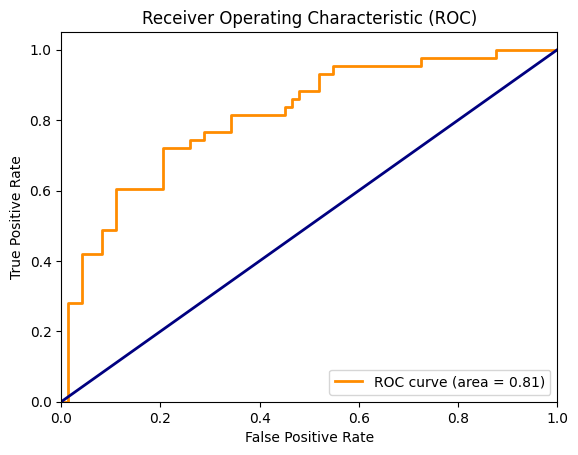

In [56]:
# Calculate the ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test, pos_label='1')
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB


#### Input Patient's Data

In [ ]:
# This function will convert user input into a numpy array that can be fed into the model
def input_features():
     Pregnancies = int(input("Enter  Pregnancies value: "))
     Glucose = float(input("Enter Glucose value: "))
     BloodPressure = float(input("Enter BloodPressure value: "))
     SkinThickness=float(input("Enter SkinThickness value: "))
     Insulin=float(input("Enter Insulin value: "))
     BMI=float(input("Enter BMI value: "))
     DiabetesPedigreeFunction=float(input("Enter DiabetesPedigreeFunction value: "))
     Age=int(input("Enter Age value: "))

    # Create a numpy array from the input values
     features_array = np.array([[Pregnancies, Glucose, BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])

     return features_array

# 'best_rf' is the trained RandomForestClassifier model
# Let's get the input from the user
user_input = input_features()

# Predict the target variable based on the user input
predicted_target = best_rf.predict(user_input)

# Output the predicted target value
print(f"The predicted target variable is: {predicted_target[0]}")
print(f"The predicted target variable is: {'POSITIVE' if predicted_target[0] == 1 else 'NEGATIVE'}")
